In [75]:
!pip install scikit-learn

In [76]:
import pandas as pd
import numpy as np
import keras.backend as k
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit



In [77]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)
stock = pd.read_csv('TSLA.csv')

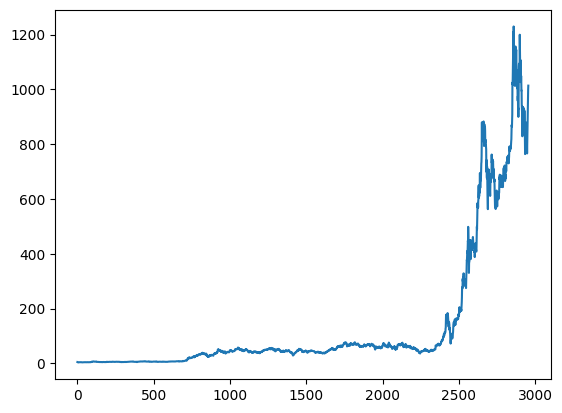

In [78]:
stock.head()
stock
stock['Adj Close'].plot()
output_var = stock[['Adj Close']]

In [79]:
features = ['open','high','low','volume']
feature = [x.lower() for x in features]

In [80]:
print(stock.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [81]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock[['Open', 'High', 'Low', 'Volume']])
feature_transfrom = pd.DataFrame(columns=feature, data=feature_transform, index = stock.index)
feature_transfrom.head()
timesplit = TimeSeriesSplit(n_splits=5)

In [101]:
for train_index, test_index in timesplit.split(feature_transfrom):
    x_train, x_test = feature_transfrom[:len(train_index)], feature_transfrom[len(train_index):(len(train_index)+len(test_index))]
    # Access the 'Adj Close' column and then use .values to get the NumPy array
    # and finally, use .ravel() to flatten the array.
    y_train, y_test = output_var[:len(train_index)]['Adj Close'].values.ravel(), output_var[len(train_index):(len(train_index)+len(test_index))]['Adj Close'].values.ravel()

In [87]:
trainX = np.array(x_train)
testX = np.array(x_test)

x_train = testX.reshape(testX.shape[0],testX.shape[1],1)
x_test = trainX.reshape(trainX.shape[0],trainX.shape[1],1)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(x_train.shape[1], 1), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(x_train.shape[1], 1), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [104]:
history = lstm.fit(x_train, y_train, epochs=100, batch_size=4, verbose=1, shuffle=False,validation_data=(x_test, y_test))
y_pred = lstm.predict(x_test)

Epoch 1/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8388 - val_loss: 159723.4375
Epoch 2/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7966 - val_loss: 155781.8438
Epoch 3/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.7601 - val_loss: 152215.7031
Epoch 4/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7423 - val_loss: 149052.4531
Epoch 5/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7263 - val_loss: 145856.1250
Epoch 6/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7143 - val_loss: 142584.2812
Epoch 7/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7058 - val_loss: 139224.9062
Epoch 8/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7035 - val_loss: 135738.2500
Epoch 9/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.6877 - val_loss: 132809.2969
Epoch 10/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.6417 - val_loss: 130295.8750
Epoch 11/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6102 - val_loss

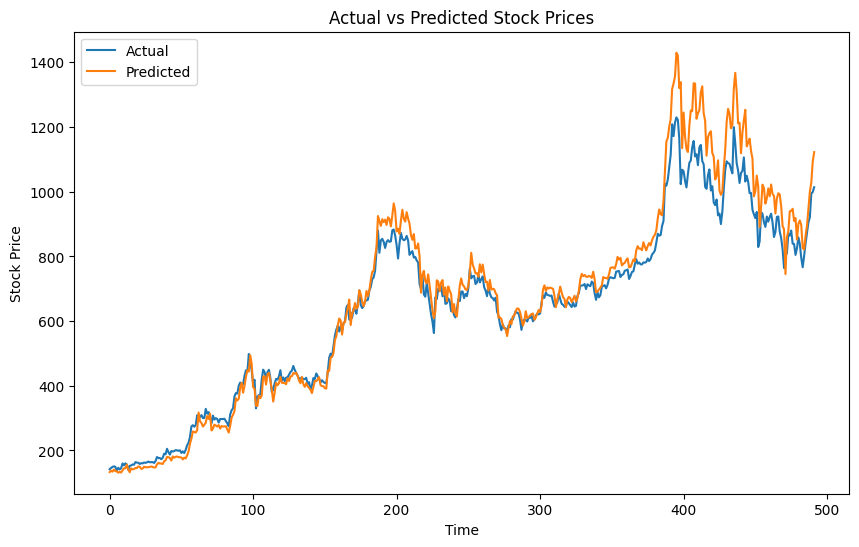

<ipython-input-106-d90c972f11e5>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


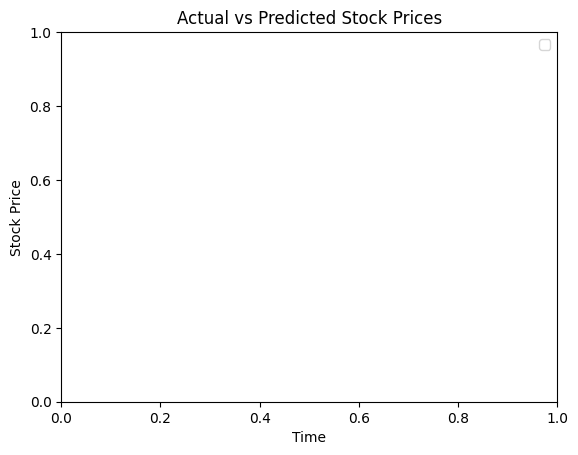

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()